**ESTUDIO DE CORRELACIÓN DE VARIABLES IRIS**
1. Librerías a utilizar
2. Regresión lineal
3. Conclusiones y próximos pasos

#### 1. Librerías a utilizar
* pandas
* numpy
* matplotlib
* scipy

In [1]:
# Utilizamos librería pandas por que el tamaño de los datos es pequeño (150 items)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
# Los datos no contienen cabeceras
df = pd.read_csv("iris_clean.csv")
df

,Unnamed: 0,longitud_sepalo,ancho_sepalo,longitud_petalo,ancho_petalo,clase
0,0,5.1,3.5,1.4,1.2,setosa
1,1,4.9,3.0,1.4,0.2,setosa
2,2,4.7,3.2,1.3,0.2,setosa
3,3,4.6,3.1,1.5,0.2,setosa
4,4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...
145,145,6.7,3.0,5.2,2.3,virginica
146,146,6.3,2.5,5.0,1.9,virginica
147,147,6.5,3.0,5.2,2.0,virginica
148,148,6.2,3.4,5.4,2.3,virginica


#### 2. Regresión lineal

##### 2.1 Ancho del sépalo en función de la longitud del sépalo para la especie SETOSA

In [2]:
# Vamos a estudiar el ancho del sépalo en función de la longitud del sépalo para la especie Setosa
"""
  f(x) = x * c + k  ??
"""
x = df[df["clase"] == 'setosa']['longitud_sepalo'].values
y = df[df["clase"] == 'setosa']['ancho_sepalo'].values
print(*x, sep=", ")
print(*y, sep=", ")

5.1, 4.9, 4.7, 4.6, 5.0, 5.4, 4.6, 5.0, 4.4, 4.9, 5.4, 4.8, 4.8, 4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5.0, 5.0, 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5.0, 5.5, 4.9, 4.4, 5.1, 5.0, 4.5, 4.4, 5.0, 5.1, 4.8, 5.1, 4.6, 5.3, 5.0
3.5, 3.0, 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3.0, 3.0, 4.0, 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3.0, 3.4, 3.5, 3.4, 3.2, 3.1, 3.4, 4.1, 4.2, 3.1, 3.2, 3.5, 3.1, 3.0, 3.4, 3.5, 2.3, 3.2, 3.5, 3.8, 3.0, 3.8, 3.2, 3.7, 3.3


In [3]:
# Obtenemos datos de regresión de x e y con stats.linregress
slope, intercept, r, p, std_err = stats.linregress(x, y)
# Mostramos parámetros de la regresión
print(f"Pendiente: {slope*100:.2f}% \nIntercept: {intercept:.2f}\nCoef. correlación: {r*100:.2f}%\np-value: {p:.2f}\nError estándar: {std_err:.2f}")
# definimos la función y'
f_x = lambda x: slope * x + intercept
# Obtenemos datos del modelo para toda la serie x (en caso de que fueran muchos podríamos separar entre datos de test y modelo)
model = list(map(f_x, x))


Pendiente: 80.72% 
Intercept: -0.62
Coef. correlación: 74.68%
p-value: 0.00
Error estándar: 0.10


##### Explicación
Podríamos decir que el "Ancho del sépalo" para la especie SETOSA es igual a 0.8072 veces la "Longitud del sépalo" menos 0.62 mm, con un coeficiente de correlación del 75 % aproximadamente (p-value es menor que 0.05 lo cual nos indica que es Estadísiticamente significante)

Esta función nos permitiría predecir el valor del "Ancho del sépalo" de una especie SETOSA si sabemos su "Longitud de sépalo"

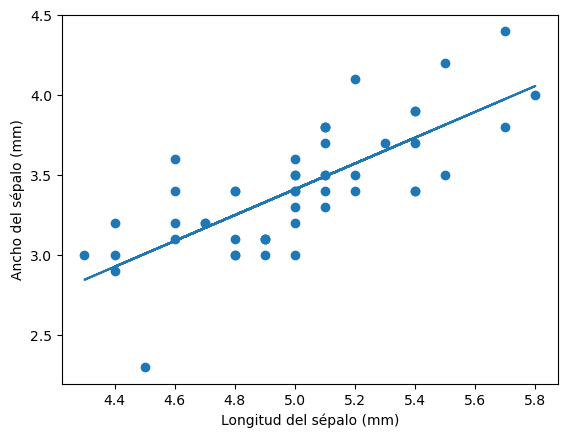

In [4]:
# Representamos gráficamente los puntos (x, y)
plt.scatter(x, y)
# y el modelo obtenido de la función f(x) y'
plt.plot(x, model)
plt.xlabel('Longitud del sépalo (mm)')
plt.ylabel('Ancho del sépalo (mm)')
plt.show()

In [37]:
# Estudio de correlación global
df_correlation = df.filter(items=['longitud_sepalo','ancho_sepalo','longitud_petalo','ancho_petalo'])
correlation = df_correlation.corr()
correlation

,longitud_sepalo,ancho_sepalo,longitud_petalo,ancho_petalo
longitud_sepalo,1.000000,-0.109369,0.871754,0.814786
ancho_sepalo,-0.109369,1.000000,-0.420516,-0.349526
longitud_petalo,0.871754,-0.420516,1.000000,0.956551
ancho_petalo,0.814786,-0.349526,0.956551,1.000000


Index(['longitud_sepalo', 'ancho_sepalo', 'longitud_petalo', 'ancho_petalo'], dtype='object')


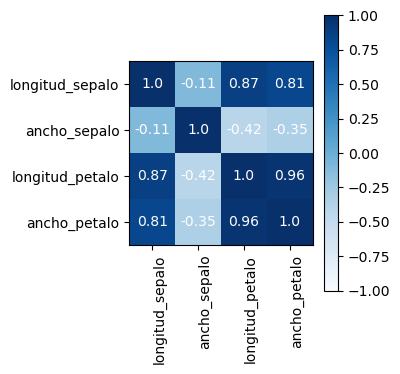

In [60]:
# Representación gráfica
fig, axes = plt.subplots(figsize=(4,4))
im = axes.imshow(correlation, vmin=-1, vmax=1, cmap="Blues")
cbar = axes.figure.colorbar(im, ax=axes)
axes.set_xticks(np.arange(4))
axes.set_yticks(np.arange(4))
axes.set_xticklabels(correlation.columns)
axes.set_yticklabels(correlation.columns)
plt.setp(axes.get_xticklabels(), rotation=90, ha="right", rotation_mode="anchor")
for i in range(correlation.index.__len__()):
  for j in range(len(correlation.columns)):
    text = axes.text(j, i, round(correlation.iloc[i,j],2), ha="center", va="center", color="w")
fig.tight_layout()
print(correlation.columns)
plt.show()